In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

faces = fetch_olivetti_faces()
images = faces.images
targets = faces.target

ss = StandardScaler(with_std=False)
X = ss.fit_transform(faces['data'])

knn = NearestNeighbors(algorithm='ball_tree', n_neighbors=25, leaf_size=30)
knn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [17]:
X_noise = X[10] + np.random.normal(0.0, 1.5, size=(4096, ))

distances, neighbors = knn.kneighbors(X_noise.reshape(1, -1), return_distance=True)
print(distances[0])

[96.68786966 96.77635579 96.80816801 96.84570935 96.85723121 96.8938742
 96.89500914 96.89637222 96.92681882 96.92719297 96.93157105 96.93387819
 96.93506194 96.94817406 96.9519586  96.95713625 96.96855589 96.97478445
 96.98352005 96.98748183 96.98810626 97.00172007 97.01251884 97.0144855
 97.01851287]


25


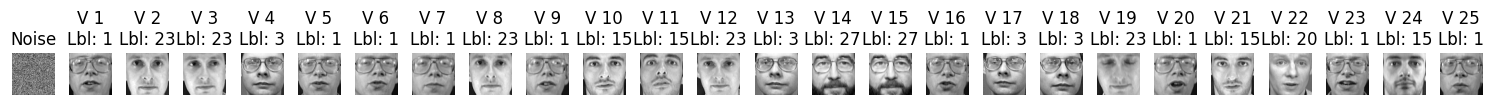

In [18]:
# 5. Mostrar imágenes
fig, axes = plt.subplots(1, 26, figsize=(15, 2))

# Imagen original con ruido
axes[0].imshow(X_noise.reshape(64, 64), cmap='gray')
axes[0].set_title("Noise")
axes[0].axis('off')

print(len(neighbors[0]))

# Vecinos más cercanos
for i, neighbor_idx in enumerate(neighbors[0]):
    axes[i + 1].imshow(images[neighbor_idx], cmap='gray')
    axes[i + 1].set_title(f"V {i+1}\nLbl: {targets[neighbor_idx]}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()